In [1]:
import os
os.chdir('/home/reffert/DeepAR_InfluenzaForecast')
from PythonFiles.model import process_R_results, evaluate_R_forecasts
from PythonFiles.PlottingFunctions import plot_coverage, print_forecasts_by_week
from PythonFiles.Configuration import Configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from PythonFiles.HpTuning import get_data
base_df = get_data(truncate=False, with_features=True)[1]
config = Configuration()
config.train_start_time = datetime(1999,1,1,0,0,0)
config.train_end_time = datetime(2018,9,30,23,0,0)
config.test_end_time = datetime(2020,9,30,23,0,0)
influenza_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/influenza.csv", sep=',')
results_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/validation_results.csv", sep=',')
locations = list(base_df.location.unique())

In [2]:
processed_df = process_R_results(config, results_df, influenza_df, validation=True)
#print(processed_df["date"].unique())
#print(len(processed_df["date"].unique()))

In [3]:
df_dict = {"hhh4":{1:processed_df[processed_df.WeekAhead == 1].copy(),
           2:processed_df[processed_df.WeekAhead == 2].copy(),
           3:processed_df[processed_df.WeekAhead == 3].copy(),
           4:processed_df[processed_df.WeekAhead == 4].copy()}}
evaluator_df = evaluate_R_forecasts(config, df_dict["hhh4"], locations, processed_df)

Evaluating 1/4 -- 2023-06-02 12:44:17.503425
Evaluating 2/4 -- 2023-06-02 12:45:16.468212
Evaluating 3/4 -- 2023-06-02 12:46:06.341125
Evaluating 4/4 -- 2023-06-02 12:46:56.208199


0       278.018231
1       328.183559
2       391.242562
3       456.233385
4              NaN
           ...    
1643           NaN
1644           NaN
1645           NaN
1646           NaN
1647           NaN
Name: mean_WIS, Length: 1648, dtype: float64
2018-09-30 23:00:00


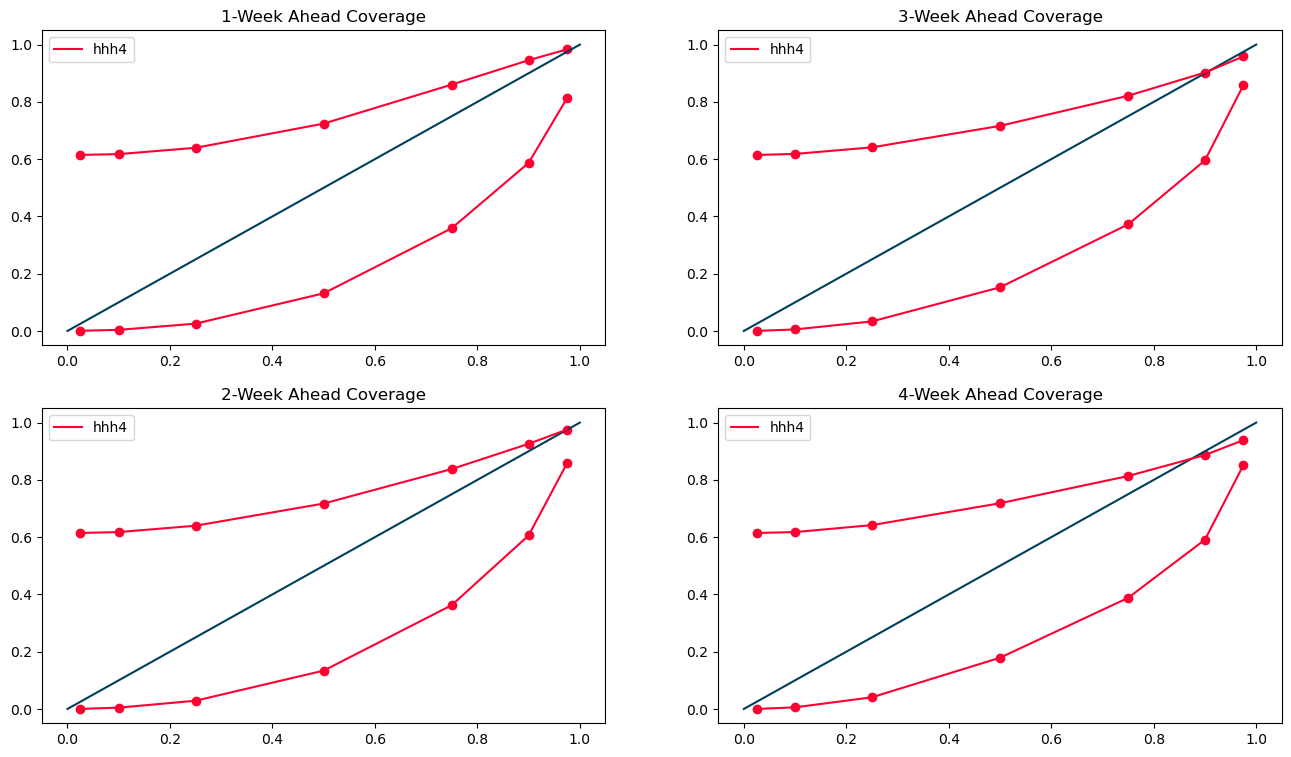

In [5]:
#print(evaluator_df[evaluator_df["mean_WIS"]!=0])
#print(evaluator_df[[col for col in evaluator_df.columns if "Coverage" in col]])
#print(evaluator_df[[col for col in evaluator_df.columns if "Quantile" in col]])
print(evaluator_df["mean_WIS"])
print(config.train_end_time)
eval_dict = {"hhh4": evaluator_df}
plot_coverage(config, eval_dict, strict=True)

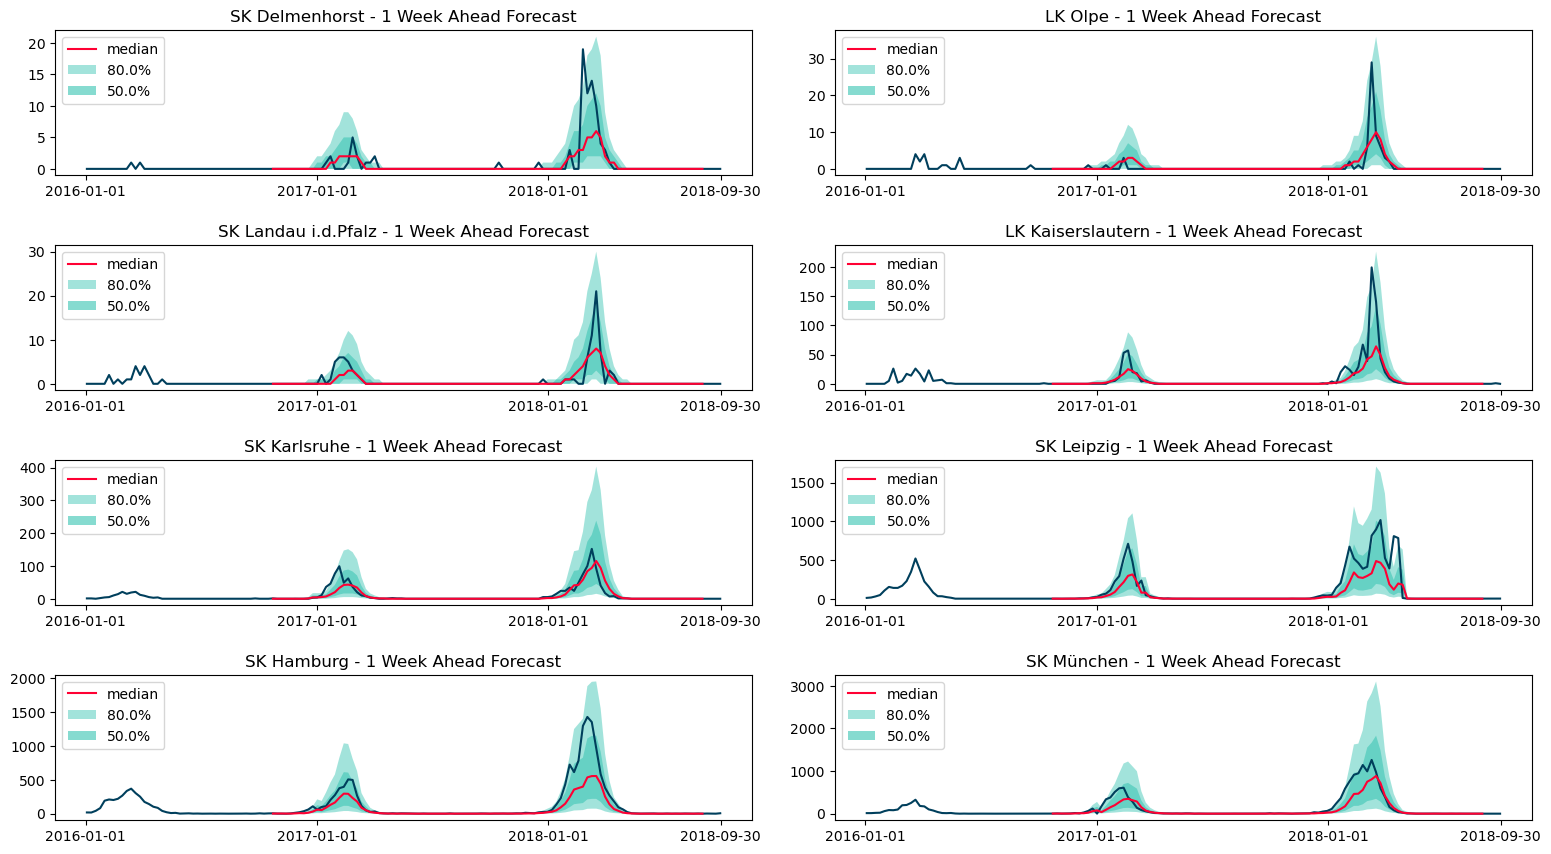

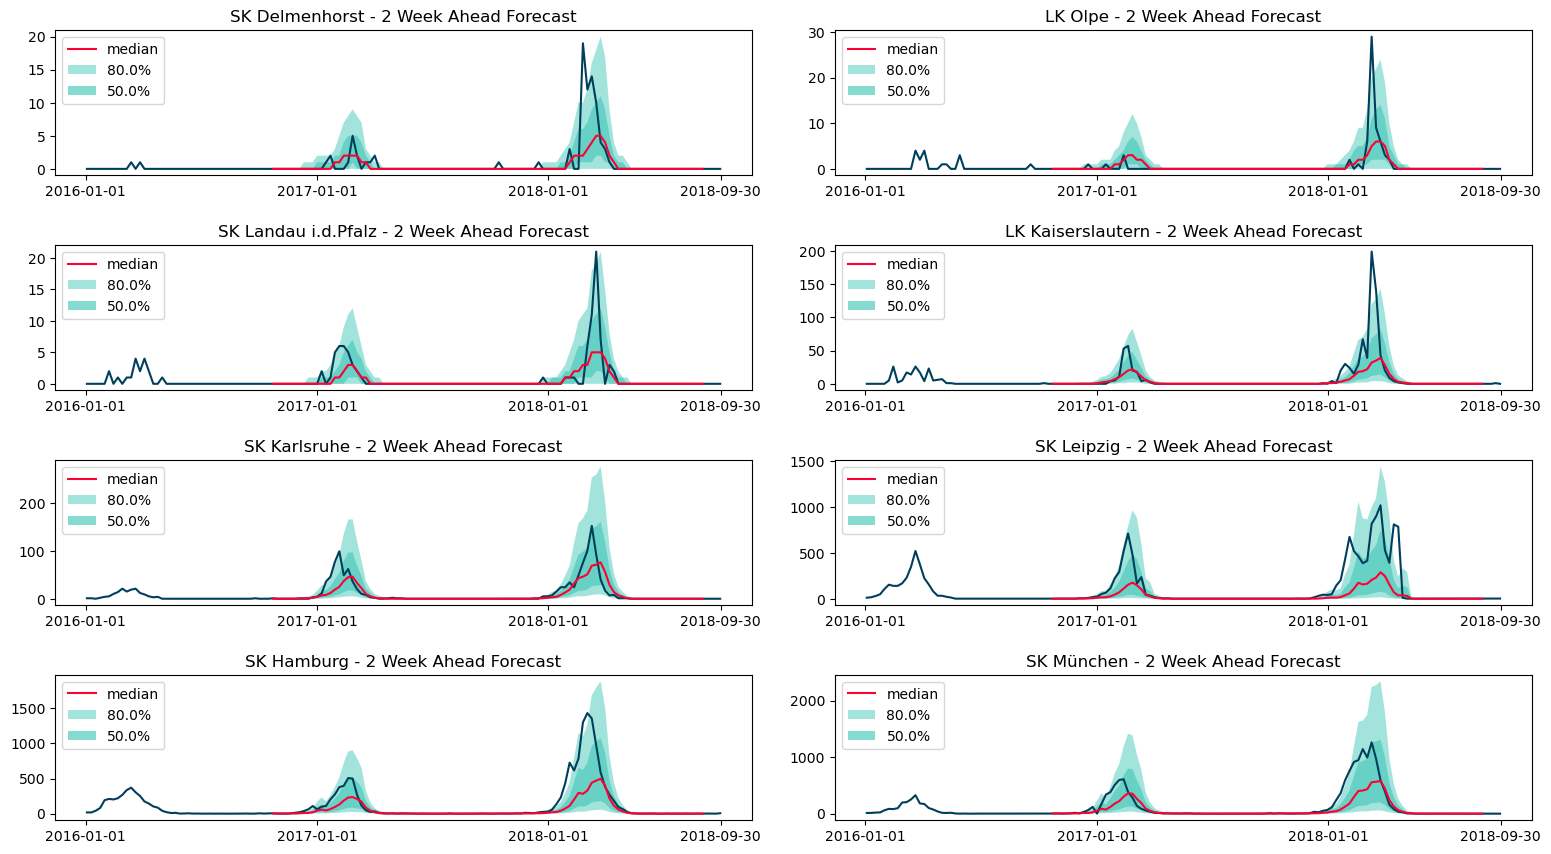

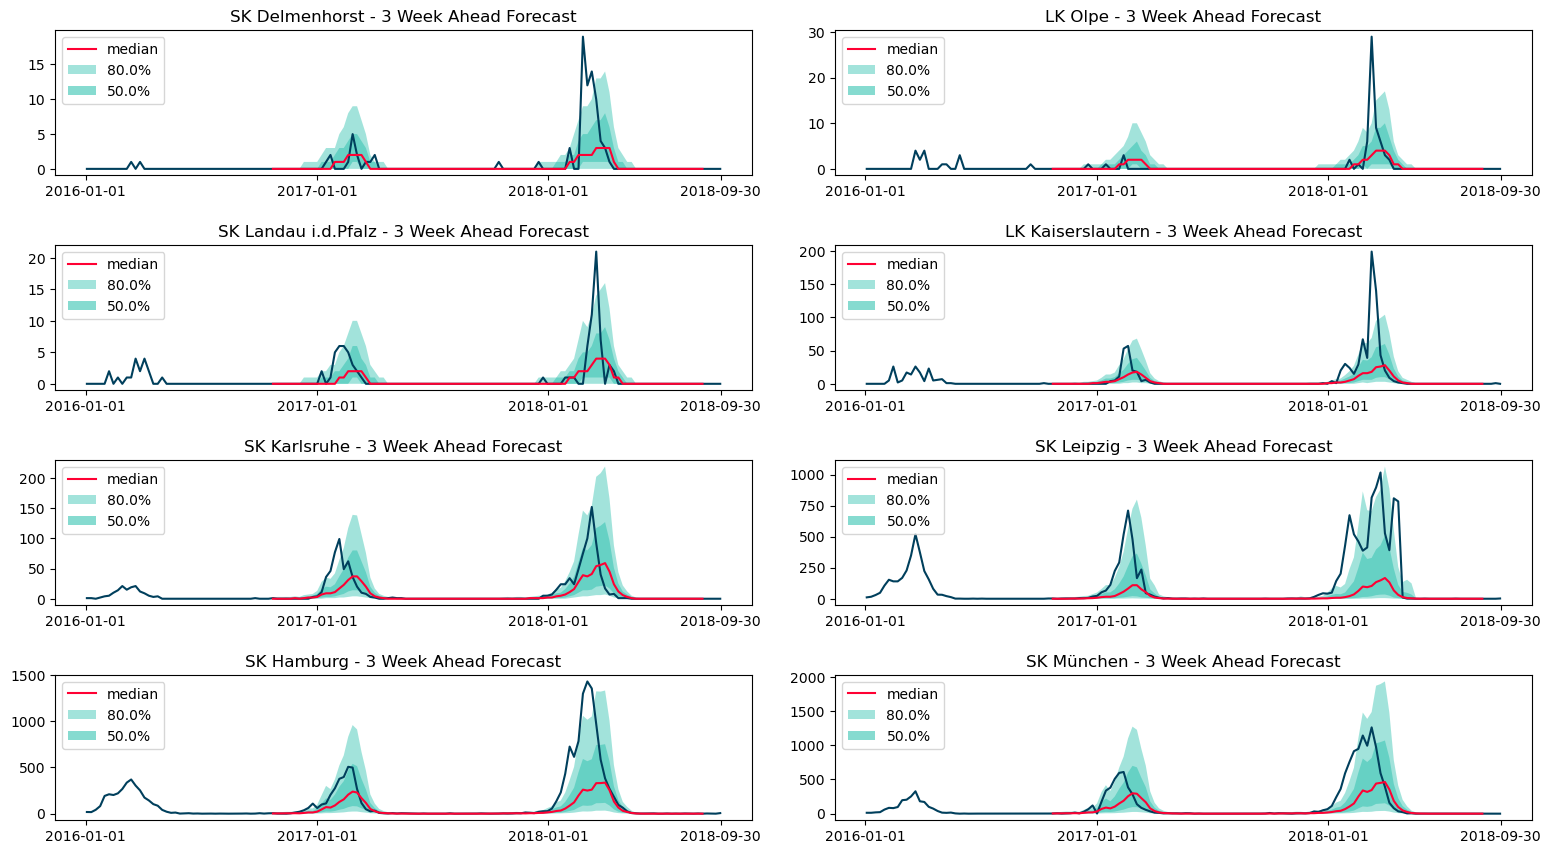

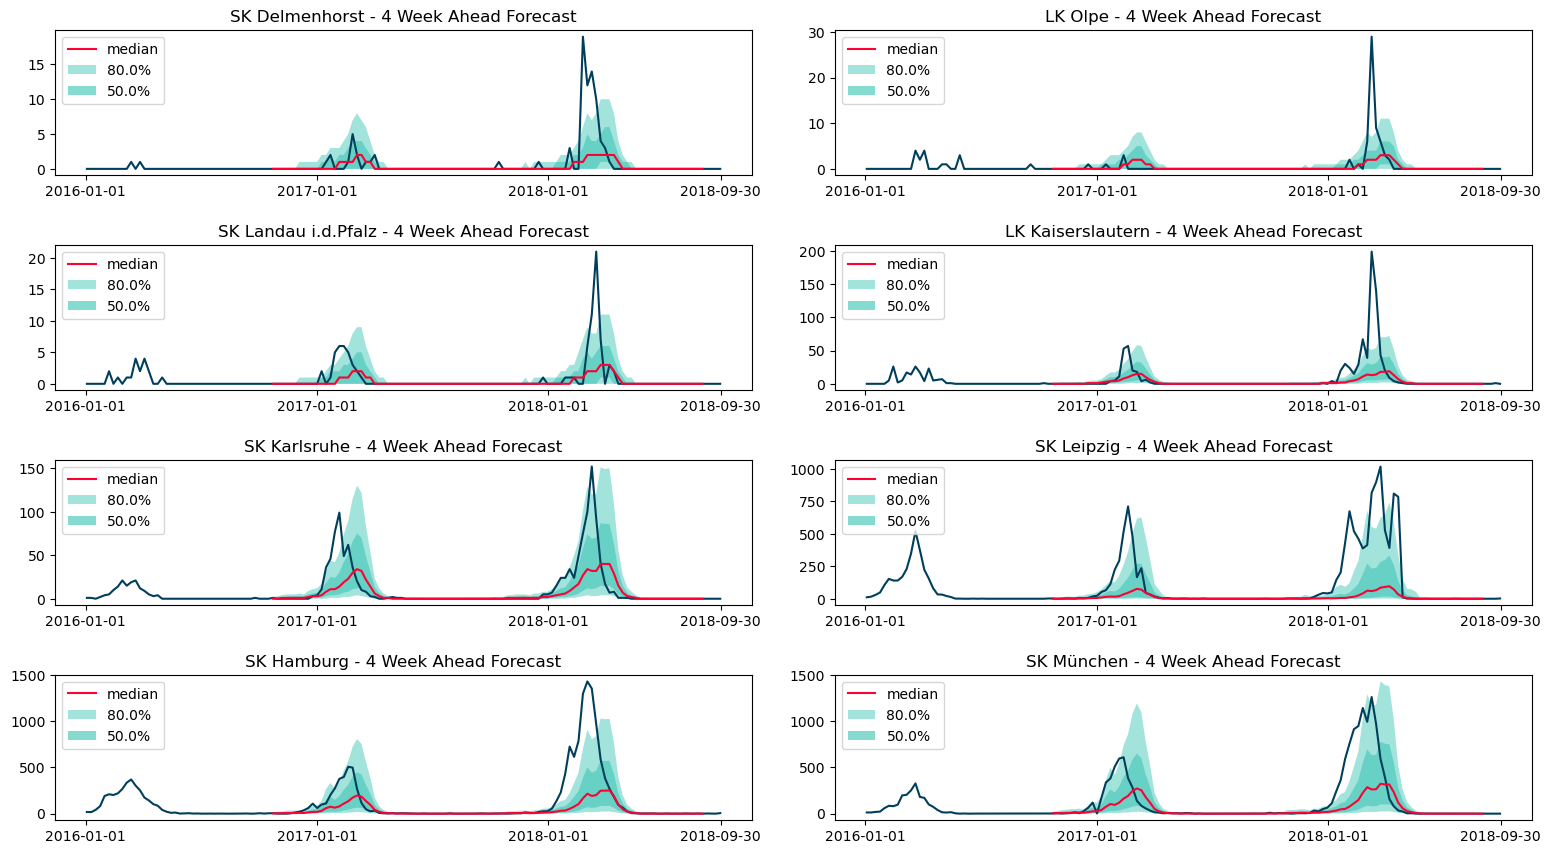

In [5]:
selected_regions = ['SK Delmenhorst','LK Olpe', 'SK Landau i.d.Pfalz','LK Kaiserslautern','SK Karlsruhe', 'SK Leipzig','SK Hamburg', 'SK München']

print_forecasts_by_week(config, base_df, df_dict, selected_regions[:], [1,2,3,4], plot_begin_at_trainstart=datetime(2016,1,1,0,0,0),\
                       savepath='/home/reffert/DeepAR_InfluenzaForecast/Notebooks/FigureCreation', filename="")

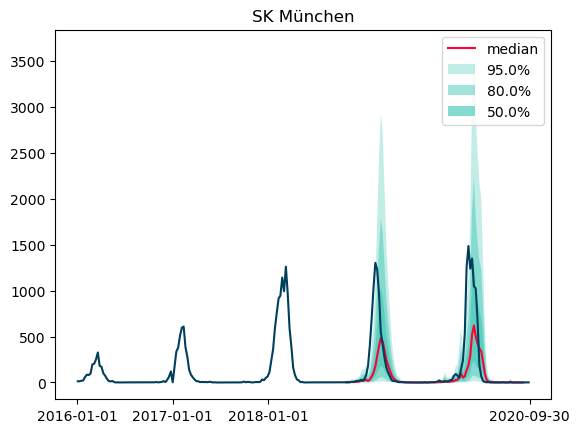

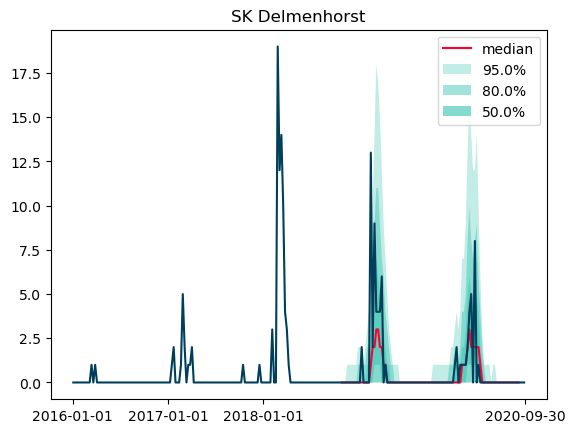

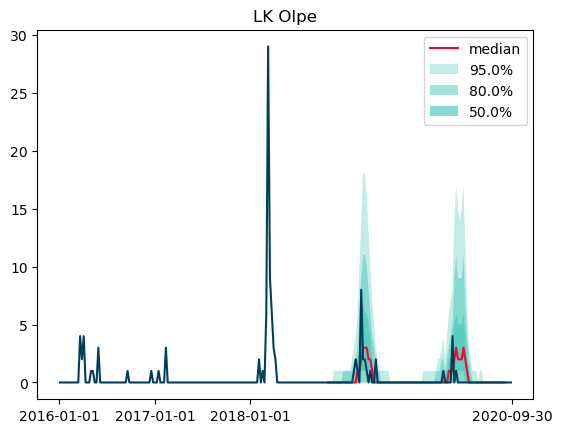

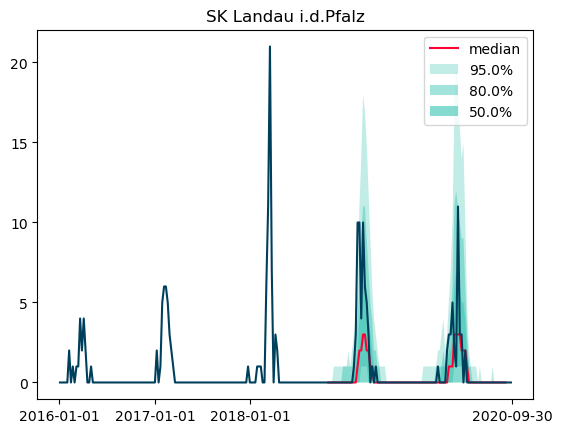

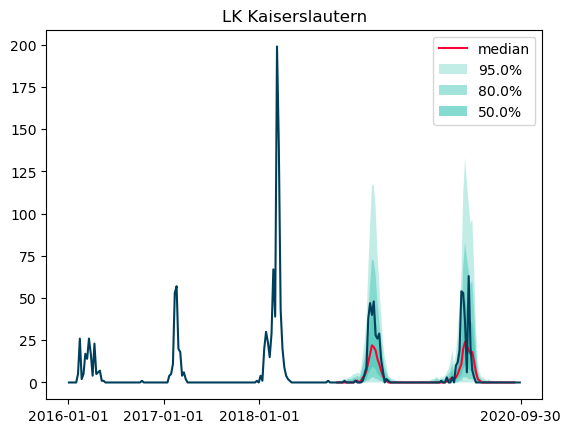

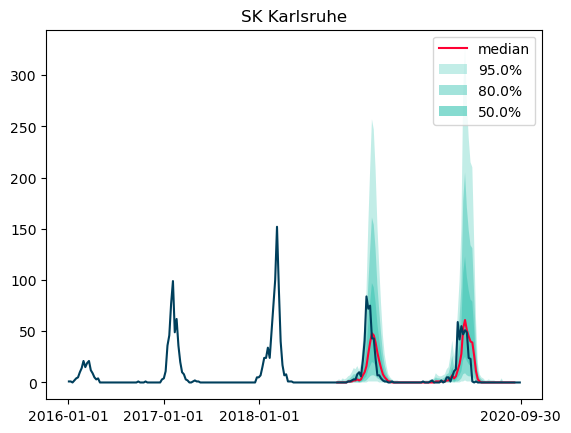

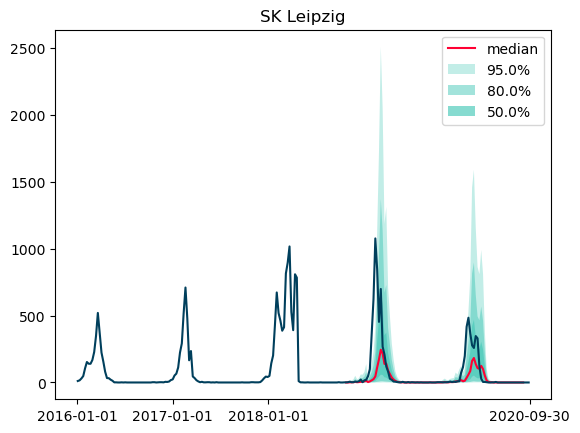

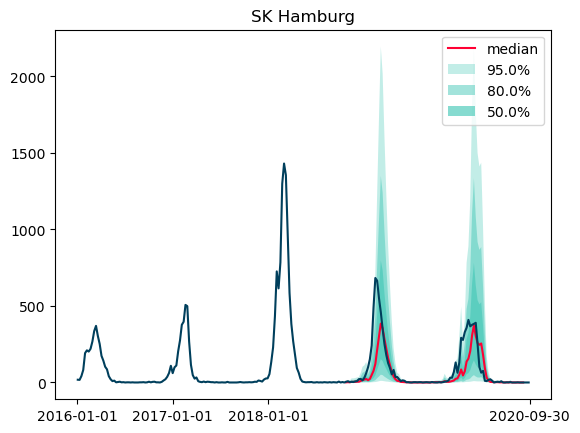

In [25]:
df = df_dict["hhh4"][2]
selected_regions = ['SK München','SK Delmenhorst','LK Olpe', 'SK Landau i.d.Pfalz','LK Kaiserslautern','SK Karlsruhe', 'SK Leipzig','SK Hamburg']
for region in selected_regions:
    plot_forecast_entry(config, df.loc[df["location"]==region], show_mean=False,ax=plt, prediction_intervals=(50.0, 80.0, 95.0), meancolor=config.colors[1],\
                        mediancolor=config.colors[1], fillcolor=config.colors[2], R_entry=True) 
    filter_index = (influenza_df["location"]==region) & (influenza_df.date >=datetime(2016,1,1)) & (influenza_df.date <=config.test_end_time)
    plt.plot(influenza_df.loc[filter_index, "date"], influenza_df.loc[filter_index,"value"], c= config.colors[0])
    plt.xticks([datetime(2016,1,1), datetime(2017,1,1), datetime(2018,1,1), config.test_end_time], rotation=0, ha="center")
    plt.title(f"{region}")
    plt.legend()
    plt.show()